## Лабораторная работа №1
## Касько Екатерина
## Группа 17-АС
## Вариант 5

In [319]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('cneos_fireball_data.csv')
df.columns = ['date', 'latitude', 'longitude', 'altitude', 'velocity', 'vx', 'vy', 'vz', 'radiated_energy', 'impact_energy']
df.head()

,date,latitude,longitude,altitude,velocity,vx,vy,vz,radiated_energy,impact_energy
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52


## 1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.

In [323]:
most_radiated_energy_row = df.iloc[df.radiated_energy.idxmax()]
print("Longitude (deg.) = ", most_radiated_energy_row.longitude)
print("Latitude (deg.) = ", most_radiated_energy_row.latitude)

Longitude (deg.) =  61.1E
Latitude (deg.) =  54.8N


## 2. Определите метеорит с максимальной и минимальной скоростью.

In [324]:
print("Fireball with max velocity:")
print(df.iloc[df.velocity.idxmax()].velocity)
print("\nFireball with min velocity:")
print(df.iloc[df.velocity.idxmin()].velocity)

Fireball with max velocity:
49.0

Fireball with min velocity:
9.8


## 3. Определите место максимальной концентрации метеоритов.

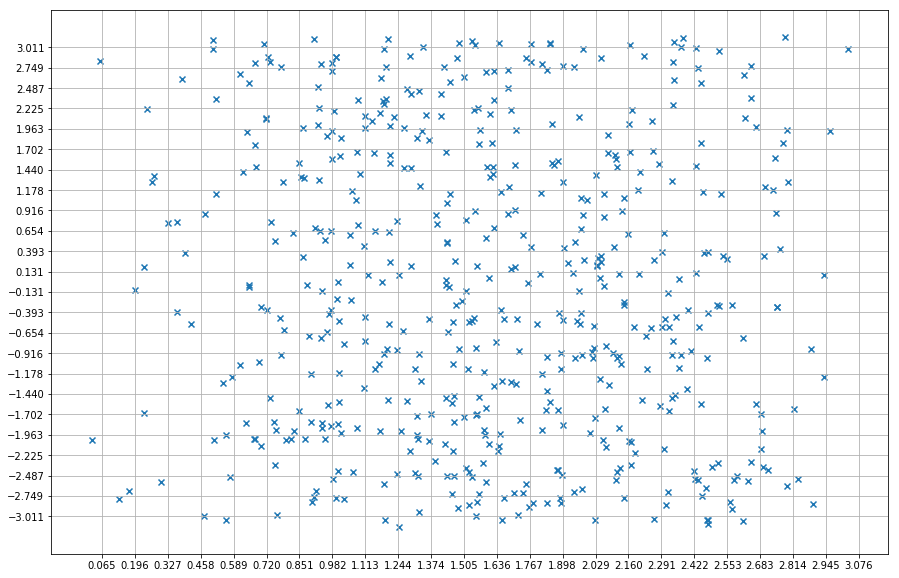

In [328]:
df_copy = df.dropna(subset=['latitude', 'longitude'])
latitude = df_copy['latitude'].apply(
    lambda lat: np.pi / 2 - np.radians(float(lat[:-1]) * (1 if lat[-1] == 'N' else -1)))
lat_bins = np.linspace(0, np.pi, 25)
lat_frequences, lat_bins = np.histogram(latitude, lat_bins)
lat_bins = (lat_bins[1:] + lat_bins[:-1])/2

longitude = df_copy['longitude'].apply(
    lambda lon: np.radians(float(lon[:-1]) * (1 if lon[-1] == 'W' else -1)))
lon_bins = np.linspace(-np.pi, np.pi, 25)
lon_frequences, lon_bins = np.histogram(longitude, lon_bins)
lon_bins = (lon_bins[1:] + lon_bins[:-1])/2

fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.set_xticks(lat_bins)
ax.set_yticks(lon_bins)
plt.scatter(latitude, longitude, marker='x')
plt.grid()
plt.show()

## 4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.

Season with max probability of asteroids(0.25312934631432543): autumn


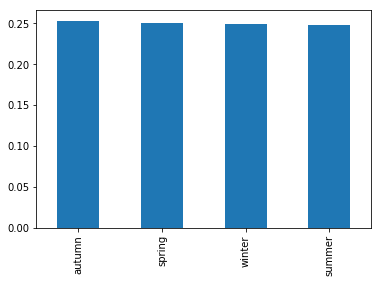

In [329]:
from datetime import datetime
df.date = pd.to_datetime(df.date)
seasons = df.date.apply(lambda dt: (dt.month%12 + 3)//3).apply(lambda season: {1: 'winter', 2: 'spring', 3: 'summer', 4: 'autumn'}[season]).value_counts().apply(lambda count: count/df.shape[0])
print('Season with max probability of asteroids({}): {}'.format(seasons.max(), seasons.idxmax()))
seasons.plot(kind='bar')

## 5. Удалите строки данных, в которых для метеоритов не указана скорость.

In [330]:
df.dropna(subset=['vx', 'vy', 'vz']).head()

,date,latitude,longitude,altitude,velocity,vx,vy,vz,radiated_energy,impact_energy
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52
5,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.60


## 6. Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов.

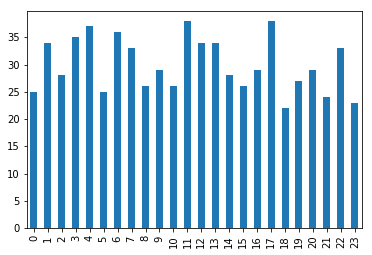

In [333]:
hours = df.date.apply(lambda date: date.hour).value_counts(sort=False)
hours.plot(kind='bar', sort_columns=True)

## 7. Заполните строки в которых для метеоритов не указана скорость.

In [336]:
df[['vx', 'vy', 'vz']].fillna(df.mode().iloc[0]).head()

,vx,vy,vz
0,-15.3,-12.1,8.8
1,-0.4,8.7,-14.8
2,-10.0,-6.5,-6.8
3,10.9,-9.7,4.2
4,17.7,13.1,-10.3


## 8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).

Season with max probability of asteroids(0.09040333796940195): Nov


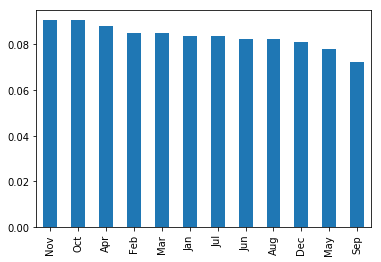

In [337]:
months_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
months = df.date.apply(lambda date: months_dict[date.month]).value_counts().apply(lambda count: count/df.shape[0])
print('Season with max probability of asteroids({}): {}'.format(months.max(), months.idxmax()))
months.plot(kind='bar')

## 9. Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и Total Radiated Energy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [338]:
df_copy = df.dropna(subset=['altitude', 'radiated_energy'])

pearson_correlation, pearson_pvalue = stats.pearsonr(df_copy['altitude'], df_copy['radiated_energy'])
print('Pearson:')
print('Correlation - ', pearson_correlation)
print('p-value - ', pearson_pvalue)

spearman_correlation, spearman_pvalue = stats.spearmanr(df_copy['altitude'], df_copy['radiated_energy'])
print('\nSpearman:')
print('Correlation - ', spearman_correlation)
print('p-value - ', spearman_pvalue)

Pearson:
Correlation -  -0.0857865652582
p-value -  0.133682698787

Spearman:
Correlation -  -0.126710419392
p-value -  0.0264157286107


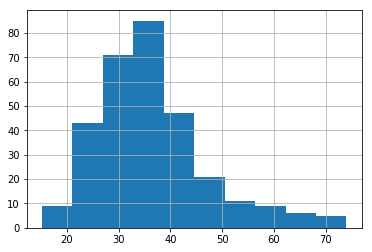

In [314]:
df_copy['altitude'].hist()

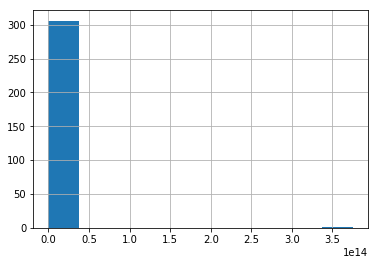

In [318]:
df_copy['radiated_energy'].hist()